In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_excel(r"C:\Users\dnclv\OneDrive\Dokumenter\Data Analyst\Data Analyst Training\PortfolioProjects Python\Adias Sales\Adidas US Sales Datasets.xlsx")

In [5]:
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [6]:
# Renaming Columns to industry standards
df = df.rename(columns={'Retailer ID': 'Retailer_ID'})
df = df.rename(columns={'Invoice Date': 'Invoice_Date'})
df = df.rename(columns={'Price per Unit': 'Price_Per_Unit'})
df = df.rename(columns={'Operating Profit': 'Operating_Profit'})
df = df.rename(columns={'Operating Margin': 'Operating_Margin'})
df = df.rename(columns={'Units Sold': 'Units_Sold'})
df = df.rename(columns={'Total Sales': 'Total_Sales'})
df = df.rename(columns={'Sales Method': 'Sales_Method'})
df.head()

,Retailer,Retailer_ID,Invoice_Date,Region,State,City,Product,Price_Per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin,Sales_Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer_ID       9648 non-null   int64         
 2   Invoice_Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price_Per_Unit    9648 non-null   float64       
 8   Units_Sold        9648 non-null   int64         
 9   Total_Sales       9648 non-null   float64       
 10  Operating_Profit  9648 non-null   float64       
 11  Operating_Margin  9648 non-null   float64       
 12  Sales_Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [8]:
# Unique values in Price Per Unit Column
df["Price_Per_Unit"].unique()

array([ 50.,  40.,  45.,  60.,  55.,  65.,  70.,  25.,  35.,  30.,  80.,
        75.,  60.,  55.,  45.,  65.,  20.,  30.,  25.,  65.,  75.,  50.,
        85.,  70.,  80., 100.,  75.,  90.,  95.,  50.,  45.,  40.,  50.,
        60.,  25.,  20.,  15.,  35.,  55.,  20.,  10.,  20.,  85.,  95.,
       110.,  90., 105.,  55.,  30.,  40.,  45.,  30.,  15.,  40.,  15.,
        25.,  10.,  35.,  45.,  80.,  90.,  25.,  60.,  35.,  65.,  20.,
        30.,  15.,  25.,  10.,  47.,  36.,  41.,  55.,  46.,  44.,  58.,
        48.,  39.,  43.,  59.,  56.,  49.,  54.,  64.,  53.,  61.,  62.,
        68.,  52.,  66.,  51.,  24.,  34.,  33.,  23.,  32.,  38.,  29.,
        37.,  27.,  42.,  72.,  63.,  69.,  76.,  67.,  57.,  28.,  18.,
        19.,  71.,  78.,  73.,  74.,  83.,  82.,  98.,  77.,  88.,  86.,
        14.,   9.,  15.,  97.,  81.,  79.,  96.,  84.,  89., 103., 101.,
        87.,  10.,  92.,  31.,  26.,  21.,  13.,  22.,  17.,  12.,  16.,
        11.,   7.,   8.])

In [9]:
# Changing Price Per Unit and Total Sales Columns to int from float, as there is no decimal numbers.
df[["Price_Per_Unit", "Total_Sales"]] = df[["Price_Per_Unit", "Total_Sales"]].astype(int)

In [10]:
df.describe()

,Retailer_ID,Price_Per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.182214,256.930037,93273.403089,34425.244761,0.422991
std,2.636038e+04,14.698080,214.252030,141915.997157,54193.113713,0.097197
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000


In [11]:
df.shape

(9648, 13)

In [12]:
# The mean of Units Sold by Retailer
df.groupby("Retailer")["Units_Sold"].mean()

Retailer
Amazon           208.630137
Foot Locker      229.188093
Kohl's           279.004854
Sports Direct    274.429134
Walmart          329.432907
West Gear        263.379107
Name: Units_Sold, dtype: float64

In [13]:
# The mean of Units Sold by Retailer and Product
df.groupby(["Retailer","Product"])["Units_Sold"].mean()

Retailer       Product                  
Amazon         Men's Apparel                153.261146
               Men's Athletic Footwear      201.176101
               Men's Street Footwear        345.176101
               Women's Apparel              225.691824
               Women's Athletic Footwear    142.683544
               Women's Street Footwear      182.350318
Foot Locker    Men's Apparel                165.226328
               Men's Athletic Footwear      234.766968
               Men's Street Footwear        354.300668
               Women's Apparel              241.314088
               Women's Athletic Footwear    165.393665
               Women's Street Footwear      210.924658
Kohl's         Men's Apparel                210.994152
               Men's Athletic Footwear      296.581395
               Men's Street Footwear        388.627907
               Women's Apparel              284.953488
               Women's Athletic Footwear    225.245614
               Women's S

In [14]:
# Product count by Retailer
df.groupby("Retailer")["Product"].count()

Retailer
Amazon            949
Foot Locker      2637
Kohl's           1030
Sports Direct    2032
Walmart           626
West Gear        2374
Name: Product, dtype: int64

In [15]:
# Operating Margin mean by Product
df.groupby("Product")["Operating_Margin"].mean()

Product
Men's Apparel                0.413225
Men's Athletic Footwear      0.402702
Men's Street Footwear        0.446130
Women's Apparel              0.441318
Women's Athletic Footwear    0.424359
Women's Street Footwear      0.410199
Name: Operating_Margin, dtype: float64

In [16]:
# The mean of Operating Profit by Product
df.groupby("Product")["Operating_Profit"].mean()

Product
Men's Apparel                27872.372559
Men's Athletic Footwear      32203.036143
Men's Street Footwear        51429.975540
Women's Apparel              42693.389652
Women's Athletic Footwear    24268.857372
Women's Street Footwear      28044.668414
Name: Operating_Profit, dtype: float64

In [17]:
# The mean of Operating Margin by Retailer and Product
df.groupby(["Retailer","Product"])["Operating_Margin"].mean()

Retailer       Product                  
Amazon         Men's Apparel                0.370764
               Men's Athletic Footwear      0.438553
               Men's Street Footwear        0.452013
               Women's Apparel              0.447233
               Women's Athletic Footwear    0.389430
               Women's Street Footwear      0.408344
Foot Locker    Men's Apparel                0.392910
               Men's Athletic Footwear      0.399570
               Men's Street Footwear        0.447350
               Women's Apparel              0.449700
               Women's Athletic Footwear    0.419140
               Women's Street Footwear      0.398425
Kohl's         Men's Apparel                0.463333
               Men's Athletic Footwear      0.385174
               Men's Street Footwear        0.458081
               Women's Apparel              0.342965
               Women's Athletic Footwear    0.425380
               Women's Street Footwear      0.441105
Sport

In [18]:
# Total Sales by Region and Retailer
df.groupby(["Region", "Retailer"])["Total_Sales"].mean()

Region     Retailer     
Midwest    Amazon           123793.139706
           Foot Locker       57127.791667
           Kohl's            91104.114754
           Sports Direct     91633.472028
           West Gear         61586.215847
Northeast  Amazon            67028.791128
           Foot Locker       78235.251497
           Kohl's            82536.188235
           Sports Direct     53459.008658
           Walmart          207757.651515
           West Gear        106932.850993
South      Amazon            34090.916667
           Foot Locker       64632.083333
           Kohl's            53819.015152
           Sports Direct     89150.415301
           Walmart           90300.142077
           West Gear         81095.647059
Southeast  Amazon            80793.492537
           Foot Locker      141395.990521
           Sports Direct    126881.817330
           Walmart          140036.906667
           West Gear        192216.516484
West       Amazon           106071.603175
         

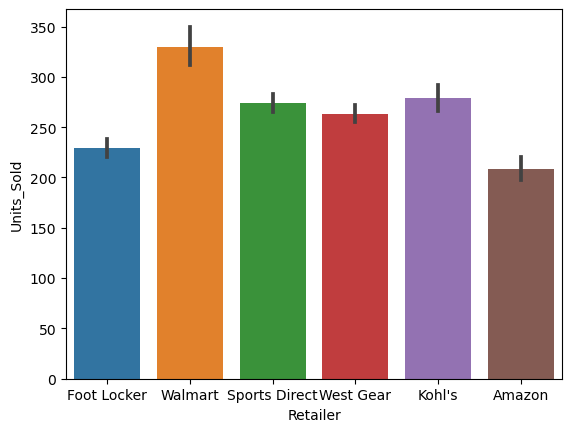

In [19]:
# Countplot of Units Sold by Retailer
sns.barplot(data=df, x="Retailer", y="Units_Sold")
plt.show()
# Walmart sells most units 

<Axes: xlabel='Region', ylabel='Units_Sold'>

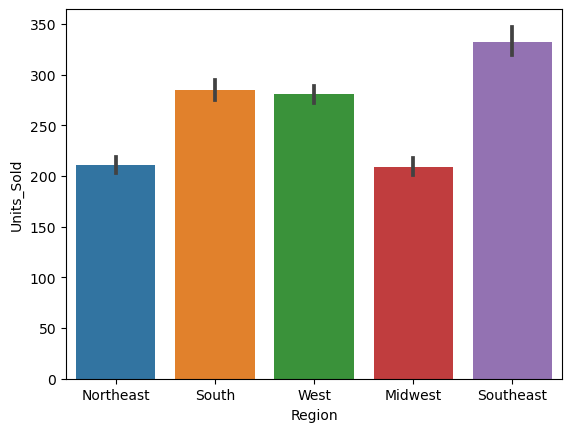

In [20]:
# Barplot displaying Units Sold by Region
sns.barplot(data=df, x="Region", y="Units_Sold")
# Southeast has the most sales followed by South

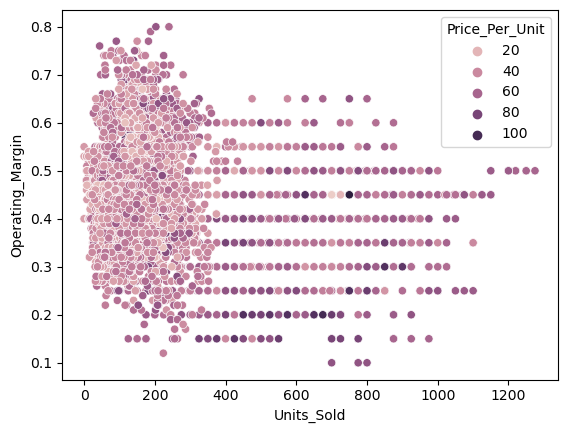

In [21]:
# Scatterplot of Units Sold and Operating Margin with Price Per Unit as colour.
sns.scatterplot(data=df, x="Units_Sold", y="Operating_Margin", hue="Price_Per_Unit")
plt.show()
#No linear regression on Units Sold and Operating Margin, indicating that there is slim to no relationship between the variables.

In [22]:
df.corr()

C:\Users\dnclv\AppData\Local\Temp\ipykernel_3032\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Retailer_ID,Price_Per_Unit,Units_Sold,Total_Sales,Operating_Profit,Operating_Margin
Retailer_ID,1.000000,-0.392489,-0.003194,-0.083580,-0.027137,0.216780
Price_Per_Unit,-0.392489,1.000000,0.264963,0.434696,0.393389,-0.136192
Units_Sold,-0.003194,0.264963,1.000000,0.913431,0.892379,-0.305479
Total_Sales,-0.083580,0.434696,0.913431,1.000000,0.956307,-0.364591
Operating_Profit,-0.027137,0.393389,0.892379,0.956307,1.000000,-0.211920
Operating_Margin,0.216780,-0.136192,-0.305479,-0.364591,-0.211920,1.000000


C:\Users\dnclv\AppData\Local\Temp\ipykernel_3032\2220221740.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

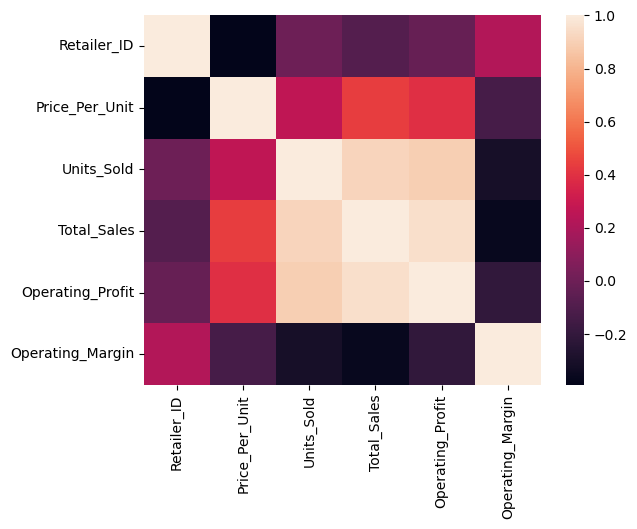

In [23]:
# Correlation heatmap on numeric vaues
sns.heatmap(df.corr())
# The result does not give any analytical value

<Axes: xlabel='Operating_Margin', ylabel='Count'>

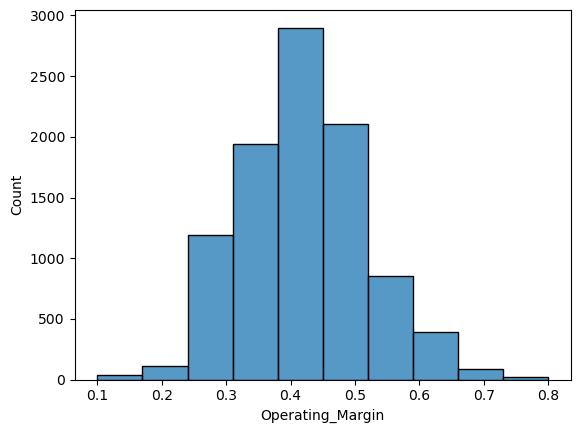

In [24]:
# Distribution of Operating Margin
sns.histplot(data=df, x="Operating_Margin", bins=10)
# The operating margin is has a normal distribution and has a mode of 0.4 

In [25]:
df.to_csv(r'C:\Users\dnclv\OneDrive\Dokumenter\Data Analyst\Data Analyst Training\PortfolioProjects Python\adidasDF.csv', sep=',', index = None,float_format='%.2f', header=True)